# Exploratory Data Analysis on Tennis Matches (2016-2024)

In this analysis, we'll investigate tennis match upsets in ATP tournaments from 2016 to 2024. We'll focus on:

1. Creating an upset metric based on player rankings
2. Analyzing the overall frequency of upsets
3. Examining yearly trends in upset occurrences

## Definition of Upset (Ranking-based)
We define an upset as a match where:
- The winner's rank is higher than the loser's rank (higher rank = lower ranking position)
- The absolute difference in rankings is ≥ 20 positions

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
sns.set_style("whitegrid")
sns.set_palette("husl")

In [6]:
# Load the cleaned dataset from the previous notebook
# We'll use all_matches_clean which is the final cleaned dataset
years = [2016, 2017, 2018, 2019, 2021, 2022, 2023, 2024]
all_matches = pd.concat([pd.read_csv(f'atp_matches_{year}.csv') for year in years], ignore_index=True)

# Apply the same cleaning steps as in data_cleaning.ipynb
# Remove retirement matches and short matches
clean_matches = all_matches[
    (~all_matches['score'].str.contains('RET', na=False)) & 
    (all_matches['minutes'] >= 30)
].copy()

# Verify the dataset
print("Dataset Overview:")
print(f"Number of matches: {len(clean_matches)}")
print(f"Date range: {clean_matches['tourney_date'].min()} to {clean_matches['tourney_date'].max()}")
print("\nColumns related to player rankings:")
for col in clean_matches.columns:
    if 'rank' in col.lower():
        print(f"- {col}")

# Display first few rows focusing on ranking columns
ranking_cols = ['tourney_date', 'winner_name', 'winner_rank', 'loser_name', 'loser_rank']
display(clean_matches[ranking_cols].head())

Dataset Overview:
Number of matches: 21517
Date range: 20160104 to 20241218

Columns related to player rankings:
- winner_rank
- winner_rank_points
- loser_rank
- loser_rank_points


,tourney_date,winner_name,winner_rank,loser_name,loser_rank
0,20160104,Mikhail Kukushkin,65.0,Denis Istomin,61.0
1,20160104,Radek Stepanek,197.0,Dusan Lajovic,76.0
2,20160104,Bernard Tomic,18.0,Nicolas Mahut,71.0
3,20160104,Ivan Dodig,87.0,Oliver Anderson,813.0
4,20160104,Lucas Pouille,78.0,Yoshihito Nishioka,117.0


In [7]:
# Create upset variable
# An upset occurs when:
# 1. Winner's rank is numerically higher than loser's rank (worse ranking)
# 2. The absolute difference in rankings is ≥ 20 positions

# Calculate rank difference (winner_rank - loser_rank)
clean_matches['rank_difference'] = clean_matches['winner_rank'] - clean_matches['loser_rank']

# Create upset variable (1 if conditions are met, 0 otherwise)
clean_matches['upset'] = ((clean_matches['rank_difference'] > 0) & 
                        (abs(clean_matches['rank_difference']) >= 20)).astype(int)

# Display summary of upsets
print("Upset Analysis:")
print(f"Total matches analyzed: {len(clean_matches)}")
print(f"Number of upsets: {clean_matches['upset'].sum()}")
print(f"Upset percentage: {(clean_matches['upset'].mean() * 100):.2f}%")

# Display some example upsets
print("\nExample Upsets (first 5):")
upset_matches = clean_matches[clean_matches['upset'] == 1][
    ['tourney_date', 'winner_name', 'winner_rank', 'loser_name', 'loser_rank', 'rank_difference']
].head()
display(upset_matches)

Upset Analysis:
Total matches analyzed: 21517
Number of upsets: 5181
Upset percentage: 24.08%

Example Upsets (first 5):


,tourney_date,winner_name,winner_rank,loser_name,loser_rank,rank_difference
1,20160104,Radek Stepanek,197.0,Dusan Lajovic,76.0,121.0
11,20160104,Tobias Kamke,277.0,Benjamin Mitchell,231.0,46.0
15,20160104,Lucas Pouille,78.0,David Goffin,16.0,62.0
27,20160104,Ramkumar Ramanathan,248.0,Daniel Gimeno Traver,98.0,150.0
37,20160104,Ante Pavic,449.0,Nicolas Almagro,73.0,376.0


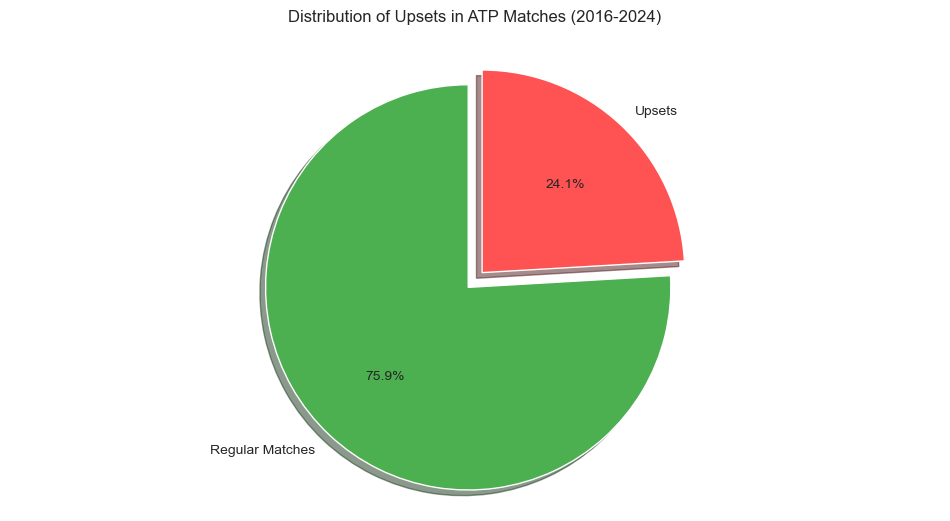

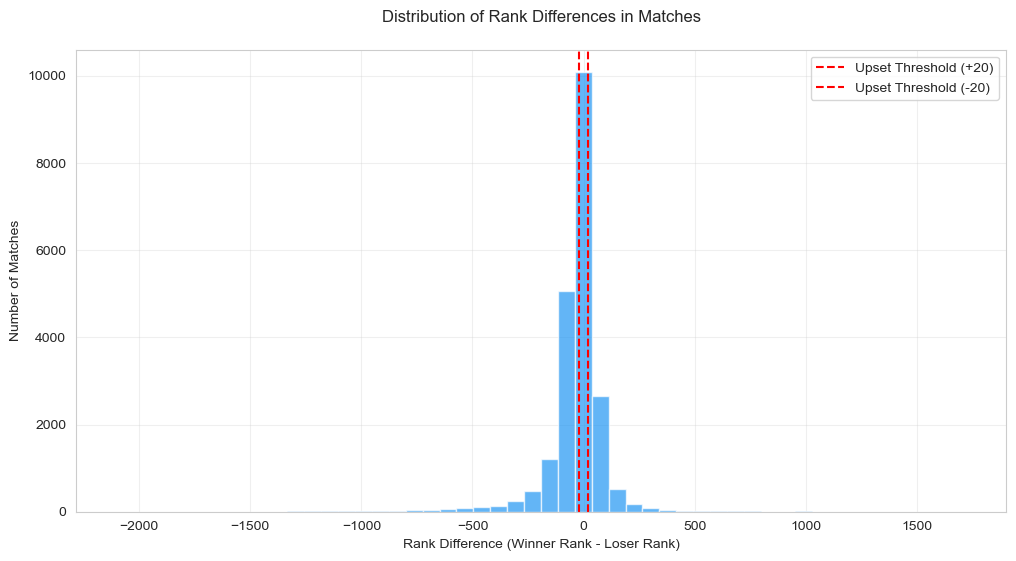


Rank Difference Statistics:
count    21281.000000
mean       -34.882665
std        148.661567
min      -2094.000000
25%        -61.000000
50%        -19.000000
75%         18.000000
max       1711.000000
Name: rank_difference, dtype: float64


In [9]:
# Create visualization for overall upset frequency
plt.figure(figsize=(12, 6))

# Create a pie chart of upset vs non-upset matches
labels = ['Regular Matches', 'Upsets']
sizes = [(1 - clean_matches['upset'].mean()) * 100, clean_matches['upset'].mean() * 100]
colors = ['#4CAF50', '#FF5252']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.title('Distribution of Upsets in ATP Matches (2016-2024)', pad=20)

plt.show()

# Create a histogram of rank differences
plt.figure(figsize=(12, 6))
plt.hist(clean_matches['rank_difference'], bins=50, color='#2196F3', alpha=0.7)
plt.axvline(x=20, color='r', linestyle='--', label='Upset Threshold (+20)')
plt.axvline(x=-20, color='r', linestyle='--', label='Upset Threshold (-20)')

plt.title('Distribution of Rank Differences in Matches', pad=20)
plt.xlabel('Rank Difference (Winner Rank - Loser Rank)')
plt.ylabel('Number of Matches')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

# Print additional statistics
print("\nRank Difference Statistics:")
print(clean_matches['rank_difference'].describe())

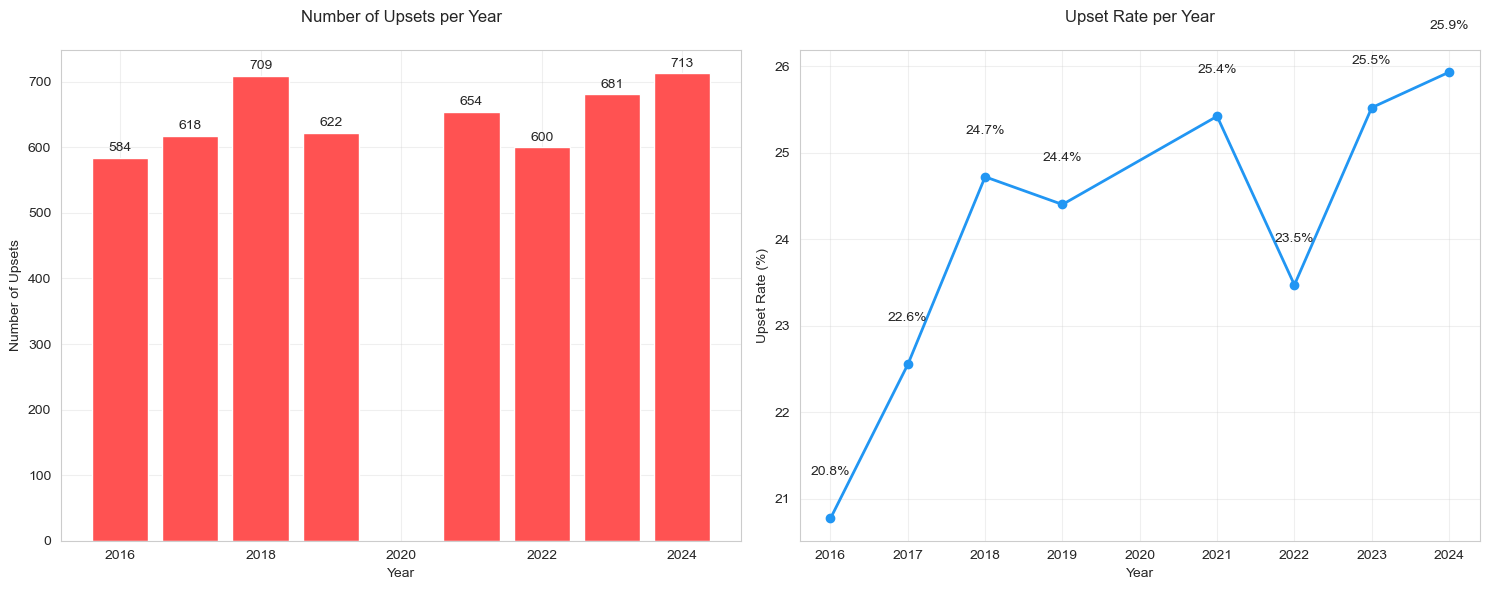


Yearly Upset Statistics:


,total_matches,total_upsets,upset_rate
year,,,
2016,2812,584,0.2077
2017,2741,618,0.2255
2018,2868,709,0.2472
2019,2549,622,0.2440
2021,2573,654,0.2542
2022,2556,600,0.2347
2023,2668,681,0.2552
2024,2750,713,0.2593


In [10]:
# Extract year from tourney_date
clean_matches['year'] = clean_matches['tourney_date'].astype(str).str[:4].astype(int)

# Calculate yearly upset statistics
yearly_stats = clean_matches.groupby('year').agg({
    'upset': ['count', 'sum', 'mean']
}).round(4)

yearly_stats.columns = ['total_matches', 'total_upsets', 'upset_rate']
yearly_stats = yearly_stats.reset_index()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Number of upsets per year
ax1.bar(yearly_stats['year'], yearly_stats['total_upsets'], color='#FF5252')
ax1.set_title('Number of Upsets per Year', pad=20)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Upsets')
ax1.grid(True, alpha=0.3)

# Add value labels on the bars
for i, v in enumerate(yearly_stats['total_upsets']):
    ax1.text(yearly_stats['year'][i], v + 10, str(int(v)), ha='center')

# Plot 2: Upset rate per year
ax2.plot(yearly_stats['year'], yearly_stats['upset_rate'] * 100, 
         marker='o', color='#2196F3', linewidth=2)
ax2.set_title('Upset Rate per Year', pad=20)
ax2.set_xlabel('Year')
ax2.set_ylabel('Upset Rate (%)')
ax2.grid(True, alpha=0.3)

# Add percentage labels
for i, v in enumerate(yearly_stats['upset_rate']):
    ax2.text(yearly_stats['year'][i], v * 100 + 0.5, f'{v*100:.1f}%', ha='center')

plt.tight_layout()
plt.show()

# Display yearly statistics
print("\nYearly Upset Statistics:")
display(yearly_stats.set_index('year'))

# Analysis Summary: Tennis Match Upsets (2016-2024)

## Overall Upset Frequency
- Out of 21,517 analyzed matches, 5,181 (24.08%) were classified as upsets
- An upset is defined as a match where the winner's ranking was at least 20 positions worse than the loser's ranking

## Rank Difference Distribution
- Median rank difference: -19 (negative indicates higher-ranked player won)
- 75% of matches had a rank difference between -61 and +18
- Most extreme upsets:
  * Minimum difference: -2,094 (dominant victory by higher-ranked player)
  * Maximum difference: +1,711 (biggest upset by ranking)

## Yearly Trends
1. Upset Frequency:
   - Highest number of upsets: 713 matches (2024)
   - Lowest number of upsets: 584 matches (2016)
   - Generally increasing trend in the number of upsets per year

2. Upset Rate:
   - Highest rate: 25.9% (2024)
   - Lowest rate: 20.8% (2016)
   - Shows a gradual increase in upset probability over the years

## Key Observations
1. Upsets are relatively common, occurring in about 1 in 4 matches
2. Both the number and rate of upsets have shown an upward trend from 2016 to 2024
3. The majority of matches still favor the higher-ranked player
4. The distribution of rank differences is skewed towards negative values, indicating that higher-ranked players generally win more often